In [272]:
import sys
sys.path.append('../')
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.data_preparation.asset_class import Asset
import warnings
warnings.filterwarnings('ignore')

In [273]:
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', "HIGHT",'CLOSE', 'LOW', 'TRANSACTIONS'])
assets = {'ETHUSD':'../data/cryptos/ETHUSD_2020-04-07_2022-04-06.parquet'}
ETHUSD_main_df = dataloader.load_dataset(assets)
ETHUSD_main_df

,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,
2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...
2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775


In [274]:
ETHUSD_df = ETHUSD_main_df.reset_index()
ETHUSD_df

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
0,2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
1,2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2,2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
3,2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
4,2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...,...
1047225,2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
1047226,2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
1047227,2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775
1047228,2022-04-06 23:57:00,305.533719,3163.120,3169.800000,3168.840000,3161.640,613


In [275]:
ETHUSD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047230 entries, 0 to 1047229
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DATE                 1047230 non-null  datetime64[us]
 1   ETHUSD_VOLUME        1047230 non-null  float64       
 2   ETHUSD_OPEN          1047230 non-null  float64       
 3   ETHUSD_HIGHT         1047230 non-null  float64       
 4   ETHUSD_CLOSE         1047230 non-null  float64       
 5   ETHUSD_LOW           1047230 non-null  float64       
 6   ETHUSD_TRANSACTIONS  1047230 non-null  int64         
dtypes: datetime64[us](1), float64(5), int64(1)
memory usage: 55.9 MB


In [276]:
summary_stats = ETHUSD_df.describe()

In [277]:
correlation_matrix = ETHUSD_df.corr()

In [278]:
print("Summary Statistics:")
print(summary_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
                             DATE  ETHUSD_VOLUME   ETHUSD_OPEN  ETHUSD_HIGHT  \
count                     1047230   1.047230e+06  1.047230e+06  1.047230e+06   
mean   2021-04-06 13:26:20.346705   4.195454e+02  1.903268e+03  1.905380e+03   
min           2020-04-07 17:58:00   5.000000e-04  1.486900e+02  1.496000e+02   
25%           2020-10-06 13:33:15   7.235071e+01  3.919150e+02  3.923200e+02   
50%           2021-04-06 09:02:30   1.700089e+02  1.915640e+03  1.918300e+03   
75%           2021-10-05 04:29:45   4.400195e+02  3.109210e+03  3.111700e+03   
max           2022-04-06 23:58:00   6.134199e+04  4.864970e+03  4.868790e+03   
std                           NaN   7.916565e+02  1.400886e+03  1.402051e+03   

       ETHUSD_CLOSE    ETHUSD_LOW  ETHUSD_TRANSACTIONS  
count  1.047230e+06  1.047230e+06         1.047230e+06  
mean   1.903275e+03  1.900886e+03         2.582546e+02  
min    1.488600e+02  1.470000e+02         1.000000e+00  
25%    3.918900e+02  3.914282e+

In [279]:
ETHUSD_df['DATE']

# Group by date and keep the last entry for each date
ETHUSD_df = ETHUSD_df.groupby(ETHUSD_df['DATE'].dt.date).last()
ETHUSD_df

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,,
2020-04-07,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47
2020-04-08,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69
2020-04-09,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60
2020-04-10,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30
2020-04-11,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23
...,...,...,...,...,...,...,...
2022-04-02,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276
2022-04-03,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269
2022-04-04,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339


In [280]:
total_days = ETHUSD_df['DATE'].dt.date.nunique()
total_years = total_days / 365.25  # Accounting for leap years

# Display the result
print("Total Days:", total_days)
print("Total Years:", total_years)

Total Days: 728
Total Years: 1.9931553730321698


In [281]:
ETHUSD_df=ETHUSD_df[ETHUSD_df['ETHUSD_VOLUME']!=0]
ETHUSD_df.reset_index(drop=True, inplace=True)
ETHUSD_df

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23
...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762


In [282]:
ETHUSD_df1 = ETHUSD_df.rename(columns={
    'DATE': 'Date',
    'ETHUSD_VOLUME': 'volume',
    'ETHUSD_OPEN': 'open',
    'ETHUSD_HIGHT': 'high',
    'ETHUSD_CLOSE': 'close',
    'ETHUSD_LOW': 'low',
    'ETHUSD_TRANSACTIONS': 'transactions'
})

# Resistance/Support Detection

In [283]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.low[i]>df1.low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.high[i]<df1.high[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
            return 0
    return 1

In [284]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [285]:
dfpl = ETHUSD_df1[100:200]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.show()

In [286]:
sr = []
n1=3
n2=2
for row in range(3, 205): #len(df)-n2
    if support(ETHUSD_df1, row, n1, n2):
        sr.append((row,ETHUSD_df1.low[row],1))
    if resistance(ETHUSD_df1, row, n1, n2):
        sr.append((row,ETHUSD_df1.high[row],2))
print(sr)

[(34, 185.49, 1), (42, 215.0, 2), (81, 220.63, 1), (101, 232.66, 1), (120, 401.25, 2), (147, 477.05, 2), (178, 345.68, 1), (188, 387.5738248, 2), (192, 365.016, 1)]


In [287]:
plotlist1 = [x[1] for x in sr if x[2]==1]
plotlist2 = [x[1] for x in sr if x[2]==2]
plotlist1.sort()
plotlist2.sort()

for i in range(1,len(plotlist1)):
    if(i>=len(plotlist1)):
        break
    if abs(plotlist1[i]-plotlist1[i-1])<=0.005:
        plotlist1.pop(i)

for i in range(1,len(plotlist2)):
    if(i>=len(plotlist2)):
        break
    if abs(plotlist2[i]-plotlist2[i-1])<=0.005:
        plotlist2.pop(i)
plotlist2
#plt.hist(plotlist, bins=10, alpha=0.5)

[215.0, 387.5738248, 401.25, 477.05]

In [288]:
s = 0
e = 200
dfpl = ETHUSD_df1[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

c=0
while (1):
    if(c>len(plotlist1)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist1[c],
                  x1=e,
                  y1=plotlist1[c],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(plotlist2)-1 ):#or sr[c][0]>e
        break
    fig.add_shape(type='line', x0=s, y0=plotlist2[c],
                  x1=e,
                  y1=plotlist2[c],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

fig.show()

In [289]:
ss = []
rr = []
n1=2
n2=2
for row in range(400, 603): #len(df)-n2
    if support(ETHUSD_df1, row, n1, n2):
        ss.append((row,ETHUSD_df1.low[row]))
    if resistance(ETHUSD_df1, row, n1, n2):
        rr.append((row,ETHUSD_df1.high[row]))

In [290]:
s = 400
e = 603
dfpl = ETHUSD_df1[s:e]
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

c=0
while (1):
    if(c>len(ss)-1 ):
        break
    fig.add_shape(type='line', x0=ss[c][0], y0=ss[c][1],
                  x1=e,
                  y1=ss[c][1],
                  line=dict(color="MediumPurple",width=3)
                  )
    c+=1

c=0
while (1):
    if(c>len(rr)-1 ):
        break
    fig.add_shape(type='line', x0=rr[c][0], y0=rr[c][1],
                  x1=e,
                  y1=rr[c][1],
                  line=dict(color="RoyalBlue",width=1)
                  )
    c+=1    

fig.show()

In [291]:
length = len(ETHUSD_df1)
high = list(ETHUSD_df1['high'])
low = list(ETHUSD_df1['low'])
close = list(ETHUSD_df1['close'])
open = list(ETHUSD_df1['open'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001      

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and 
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and 
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
       
def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0
    
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(ETHUSD_df1.high[l]-min(levels, key=lambda x:abs(x-ETHUSD_df1.high[l])))<=lim
    c2 = abs(max(ETHUSD_df1.open[l],ETHUSD_df1.close[l])-min(levels, key=lambda x:abs(x-ETHUSD_df1.high[l])))<=lim
    c3 = min(ETHUSD_df1.open[l],ETHUSD_df1.close[l])<min(levels, key=lambda x:abs(x-ETHUSD_df1.high[l]))
    c4 = ETHUSD_df1.low[l]<min(levels, key=lambda x:abs(x-ETHUSD_df1.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0
    
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(ETHUSD_df1.low[l]-min(levels, key=lambda x:abs(x-ETHUSD_df1.low[l])))<=lim
    c2 = abs(min(ETHUSD_df1.open[l],ETHUSD_df1.close[l])-min(levels, key=lambda x:abs(x-ETHUSD_df1.low[l])))<=lim
    c3 = max(ETHUSD_df1.open[l],ETHUSD_df1.close[l])>min(levels, key=lambda x:abs(x-ETHUSD_df1.low[l]))
    c4 = ETHUSD_df1.high[l]>min(levels, key=lambda x:abs(x-ETHUSD_df1.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [292]:
n1=1
n2=1
backCandles=20
signal = [0] * length

for row in range(backCandles, len(ETHUSD_df1)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(ETHUSD_df1, subrow, n1, n2):
            ss.append(ETHUSD_df1.low[subrow])
        if resistance(ETHUSD_df1, subrow, n1, n2):
            rr.append(ETHUSD_df1.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0



In [293]:
ETHUSD_df1['signal']=signal

In [294]:
ETHUSD_df1[ETHUSD_df1['signal']==2].count()

Date            21
volume          21
open            21
high            21
close           21
low             21
transactions    21
signal          21
dtype: int64

In [295]:
ETHUSD_df1.columns = ['Local time', 'Volume', 'Open', 'High', 'Close','Low', "transactions" , 'signal']
ETHUSD_candle_df=ETHUSD_df1.iloc[100:200]
ETHUSD_candle_df

,Local time,Volume,Open,High,Close,Low,transactions,signal
100,2020-07-16 23:59:00,82.061734,233.510,233.993976,233.410000,233.410,28,0
101,2020-07-17 23:59:00,58.107203,232.660,233.180000,233.180000,232.660,12,0
102,2020-07-18 23:59:00,20.200740,236.200,236.200000,236.190246,235.770,9,0
103,2020-07-19 23:59:00,246.724028,239.080,239.580000,239.240000,238.734,32,0
104,2020-07-20 23:59:00,49.249500,236.062,236.476619,236.080000,235.980,39,0
...,...,...,...,...,...,...,...,...
195,2020-10-19 23:59:00,31.580503,379.310,379.730000,379.630000,379.064,42,0
196,2020-10-20 23:59:00,67.182875,368.740,368.850000,368.810000,367.859,39,2
197,2020-10-21 23:59:00,112.297487,391.770,392.090000,390.198000,390.198,94,0
198,2020-10-22 23:59:00,101.088021,414.540,414.860000,414.310000,413.645,70,0


In [296]:
def SIGNAL():
    return ETHUSD_candle_df.signal

In [297]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):  
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next() 
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 730e-1
            tp1 = self.data.Close[-1] + 600e-1
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 730e-1
            tp1 = self.data.Close[-1] - 600e-1
            self.sell(sl=sl1, tp=tp1)

In [298]:
from backtesting import Backtest

bt = Backtest(ETHUSD_candle_df, MyCandlesStrat, cash=10_000, commission=.002)
stat = bt.run()
stat

Start                                   100.0
End                                     199.0
Duration                                 99.0
Exposure Time [%]                        59.0
Equity Final [$]                 13381.368993
Equity Peak [$]                  16422.648993
Return [%]                           33.81369
Buy & Hold Return [%]               75.450923
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -19.700354
Avg. Drawdown [%]                   -5.272707
Max. Drawdown Duration                   18.0
Avg. Drawdown Duration                  6.875
# Trades                                  5.0
Win Rate [%]                             80.0
Best Trade [%]                      19.865742
Worst Trade [%]                    -16.006621
Avg. Trade [%]                    

#Another way to do it

In [299]:
df= ETHUSD_df1.copy()

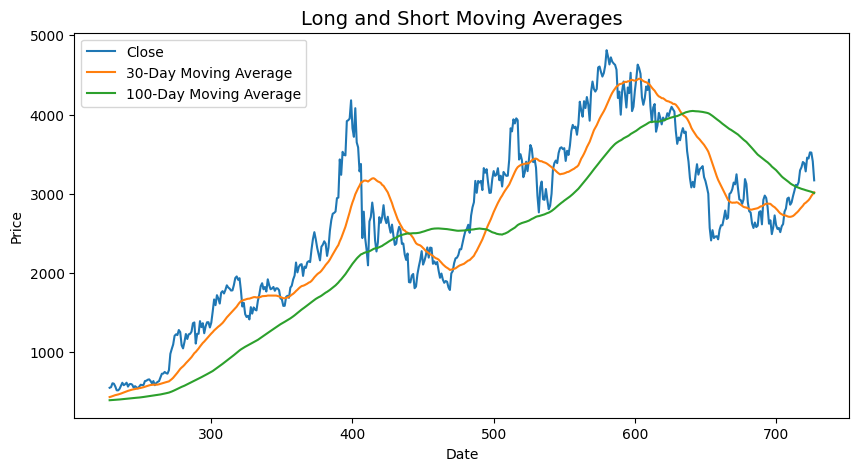

In [300]:
from matplotlib import pyplot as plt
short_window = 30
long_window = 100

# Calculate moving averages
df['short_mavg'] = df['Close'].rolling(short_window).mean()
df['long_mavg'] = df['Close'].rolling(long_window).mean()

# Plot close price and moving averages
plot_data = df[-500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='30-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='100-Day Moving Average')
plt.legend()

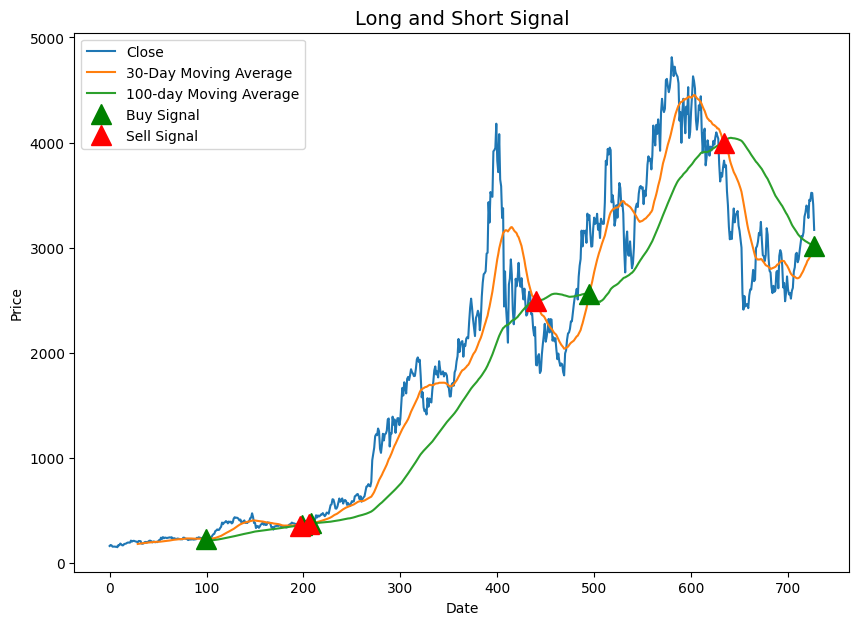

In [301]:

df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)

# Take short positions
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

# Plot close price and moving averages
plot_data = df[-3000:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='30-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='100-day Moving Average')
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
(plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(plot_data[(plot_data['short_positions'] == -1) &
(plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Sell Signal', color='red')
plt.legend()
plt.show()

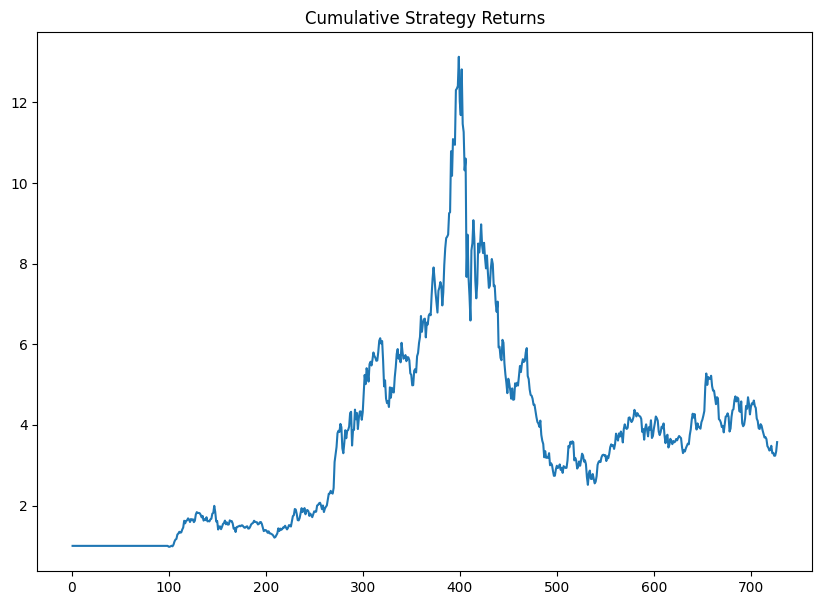

In [302]:
# Calculate daily returns
df['returns'] = df['Close'].pct_change()

# Calculate strategy returns
df['strategy_returns'] = df['returns'] * df['positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (df['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7))
plt.title('Cumulative Strategy Returns')
plt.show()

In [303]:
 #Total number of trading days
days = len(cumulative_returns)

# Calculate compounded annual growth rate
# We will use 252 instead of 365, as the number of trading days in a year is 252
annualised_returns = (cumulative_returns.iloc[-1]**(252/days)-1)*100

# Calculate annualised volatility
annualised_volatility = np.std(df.strategy_returns)*(252**0.5)*100

# Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/252
sharpe_ratio = np.sqrt(252)*(np.mean(df.strategy_returns) -
(risk_free_rate))/np.std(df.strategy_returns)

# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100
print('The annualised returns of strategy is %.2f' % annualised_returns + '%')
print('The annualised_volatility is', annualised_volatility)
print('The risk free rate is', risk_free_rate)
print('The sharpe ratio is', sharpe_ratio)
print('The maximum drawdown is', max_dd)
calmar_ratio = annualised_returns / abs(max_dd)
print('The Calmar ratio is', calmar_ratio)
downside_returns = df.strategy_returns[df.strategy_returns < 0]
downside_volatility = np.std(downside_returns) * np.sqrt(252)
sortino_ratio = (np.mean(df.strategy_returns) - risk_free_rate) / downside_volatility
print('The Sortino ratio is', sortino_ratio)
average_gain = np.mean(df.strategy_returns[df.strategy_returns > 0])
average_loss = np.mean(df.strategy_returns[df.strategy_returns < 0])
print('The average gain is', average_gain)
print('The average loss is', average_loss)
winning_percentage = (len(df.strategy_returns[df.strategy_returns > 0]) / len(df.strategy_returns)) * 100
print('The winning percentage is %.2f%%' % winning_percentage)


The annualised returns of strategy is 55.40%
The annualised_volatility is 75.86102574377234
The risk free rate is 3.968253968253968e-05
The sharpe ratio is 0.949535221583122
The maximum drawdown is -80.85479613132867
The Calmar ratio is 0.6851833881825318
The Sortino ratio is 0.0052956748763983786
The average gain is 0.03887959063487453
The average loss is -0.03726186679779635
The winning percentage is 46.02%


In [304]:
import sys
sys.path.append('..')
from src.finance_ml.backtests.strategy import Strategy, MarketAction, Operator

from src.finance_ml.data_preparation.data_preparation import DataLoader
import warnings
warnings.filterwarnings('ignore')

In [305]:

dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', "HIGHT",'CLOSE', 'LOW', 'TRANSACTIONS'])
assets = {'ETHUSD':'../data/cryptos/ETHUSD_2020-04-07_2022-04-06.parquet'}
ETHUSD_main_df = dataloader.load_dataset(assets)
ETHUSD_main_df

,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,
2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...
2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775


In [306]:
strategy = Strategy(name="Strategy_one", cash=1000, commission=0.05, min_positions=1)
strategy, type(strategy)

(Strategy: Strategy_one, src.finance_ml.backtests.strategy.Strategy)

In [307]:
data = ETHUSD_df1.copy()
data = data.rename(columns={
    'Local time': 'DATE',
    'Volume': 'Volume',
    'Open': 'OPEN',
    'High': 'HIGHT',
    'Close': 'CLOSE',
    'Low': 'LOW',
    'transactions': 'Transactions'
})

In [308]:
data

,DATE,Volume,OPEN,HIGHT,CLOSE,LOW,Transactions,signal
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,0
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,0
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,0
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,0
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,0
...,...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,0
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,0
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,0
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762,0


In [309]:

strategy.load_data(data, date_column='DATE')
strategy.data.head()

,DATE,Volume,OPEN,HIGHT,CLOSE,LOW,Transactions,signal
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560,47,0
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096,69,0
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697,60,0
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828,30,0
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410,23,0


In [310]:
rule_one = strategy.add_single_rule('CLOSE[N-2]>CLOSE[N-1]', action=MarketAction.BUY, action_quantity='ALL')
rule_one

Rule(id='Strategy_one_rule_1', condition='CLOSE[N-2]>CLOSE[N-1]', operator='&', action=<MarketAction.BUY: 'BUY'>, action_quantity='ALL', equation="self._curr_data['CLOSE'].iloc[-2] > self._curr_data['CLOSE'].iloc[-1]")

In [311]:
rule_one.equation

"self._curr_data['CLOSE'].iloc[-2] > self._curr_data['CLOSE'].iloc[-1]"

In [312]:
strategy.add_single_rule('CLOSE[N-2]<CLOSE[N-1]', action=MarketAction.SELL, action_quantity='ALL')

Rule(id='Strategy_one_rule_2', condition='CLOSE[N-2]<CLOSE[N-1]', operator='&', action=<MarketAction.SELL: 'SELL'>, action_quantity='ALL', equation="self._curr_data['CLOSE'].iloc[-2] < self._curr_data['CLOSE'].iloc[-1]")

In [313]:
strategy._raw_rules

{<MarketAction.BUY: 'BUY'>: [Rule(id='Strategy_one_rule_1', condition='CLOSE[N-2]>CLOSE[N-1]', operator='&', action=<MarketAction.BUY: 'BUY'>, action_quantity='ALL', equation="self._curr_data['CLOSE'].iloc[-2] > self._curr_data['CLOSE'].iloc[-1]")],
 <MarketAction.SELL: 'SELL'>: [Rule(id='Strategy_one_rule_2', condition='CLOSE[N-2]<CLOSE[N-1]', operator='&', action=<MarketAction.SELL: 'SELL'>, action_quantity='ALL', equation="self._curr_data['CLOSE'].iloc[-2] < self._curr_data['CLOSE'].iloc[-1]")]}

In [314]:
strategy.simulate()

In [315]:
strategy.summary()

Strategy Name: Strategy_one
First Trade Date: 2020-04-09 23:59:00
Last Trade Date: 2022-04-04 23:59:00
Total Trades: 385
Final PnL: 6483.907855318309
Starting Cash: 1000
Final Cash: 1.5096993593033403e-06
Final Positions: 2.1258686097627
Final Portfolio Value: 7483.907855318309
Total Commission: 67.71920747094966
Total Buy Commission: 33.912750450718896
Total Sell Commission: 33.80645702023076
Total Buy Amount: 938844.0902481641
Total Sell Amount: 937844.0902496738
Total Buy Quantity: 678.2550090143778
Total Sell Quantity: 676.1291404046151
Total Buy Trades: 193
Total Sell Trades: 192


In [316]:
strategy.plot_history(title="Strategy_one", yaxis_title="Stock's Price", xaxis_title="Date")

In [317]:
from src.finance_ml.indicators.indicators import Indicators

In [318]:
ticker = 'ETHUSD'
norm_data = True
ind_processor = Indicators(ticker = ticker, norm_data = False, calc_all=False, list_ind=['SMA'], SMA_win=10)
ETHUSD_mv_df = ind_processor.fit_transform(ETHUSD_main_df)
ETHUSD_mv_df

,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,ETHUSD_SMA_w10
DATE,,,,,,,
2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34,NaN
2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39,NaN
2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64,NaN
2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66,NaN
2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31,NaN
...,...,...,...,...,...,...,...
2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661,3177.792
2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020,3176.696
2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775,3174.887


In [319]:
from ta.trend import SMAIndicator

sma_10 = SMAIndicator(close=data['CLOSE'], window=10, fillna=False)
data['SMA_20'] = sma_10.sma_indicator()
sma_30 = SMAIndicator(close=data['CLOSE'], window=30, fillna=False)
data['SMA_40'] = sma_30.sma_indicator()

data

,DATE,Volume,OPEN,HIGHT,CLOSE,LOW,Transactions,signal,SMA_20,SMA_40
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,0,NaN,NaN
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,0,NaN,NaN
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,0,NaN,NaN
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,0,NaN,NaN
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,0,3296.724,2919.598
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,0,3337.752,2942.569
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,0,3379.377,2972.480
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762,0,3405.656,2997.256


In [320]:
sma_strategy = Strategy(name="SMA Strategy_Two", cash=1000, commission=0.05, min_positions=1)
data = data.copy()
sma_strategy.load_data(data, date_column='DATE')
sma_strategy.add_single_rule('SMA_20[N-1]>SMA_40[N-1]', action=MarketAction.SELL, action_quantity='ALL')
sma_strategy.add_single_rule('SMA_20[N-1]<SMA_40[N-1]', action=MarketAction.BUY, action_quantity='ALL')
sma_strategy.simulate()

sma_strategy.summary()
sma_strategy.plot_history(title="SMA Strategy_Two", yaxis_title="Stock's Price", xaxis_title="Date", plot_columns=['CLOSE', 'SMA_20', 'SMA_40'])

Strategy Name: SMA Strategy_Two
First Trade Date: 2020-06-23 23:59:00
Last Trade Date: 2020-10-13 23:59:00
Total Trades: 6
Final PnL: 292.6158623572012
Starting Cash: 1000
Final Cash: 1292.6158623572012
Final Positions: 0.0
Final Portfolio Value: 1292.6158623572012
Total Commission: 1.0016683258310972
Total Buy Commission: 0.5008341629155486
Total Sell Commission: 0.5008341629155486
Total Buy Amount: 3189.6544026896963
Total Sell Amount: 3482.2702650468973
Total Buy Quantity: 10.016683258310971
Total Sell Quantity: 10.016683258310971
Total Buy Trades: 3
Total Sell Trades: 3


In [321]:
from ta.trend import SMAIndicator

sma_10 = SMAIndicator(close=data['CLOSE'], window=10, fillna=False)
data['SMA_10'] = sma_10.sma_indicator()
sma_30 = SMAIndicator(close=data['CLOSE'], window=30, fillna=False)
data['SMA_30'] = sma_30.sma_indicator()

data

,DATE,Volume,OPEN,HIGHT,CLOSE,LOW,Transactions,signal,SMA_20,SMA_40,SMA_10,SMA_30
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,0,NaN,NaN,NaN,NaN
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,0,NaN,NaN,NaN,NaN
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,0,NaN,NaN,NaN,NaN
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,0,NaN,NaN,NaN,NaN
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,0,3296.724,2919.598,3296.724,2919.598
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,0,3337.752,2942.569,3337.752,2942.569
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,0,3379.377,2972.480,3379.377,2972.480
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762,0,3405.656,2997.256,3405.656,2997.256


In [322]:
sma_strategy = Strategy(name="SMA Strategy", cash=1000, commission=0.02, min_positions=1)
data = data.copy()
sma_strategy.load_data(data, date_column='DATE')
sma_strategy.add_single_rule('SMA_10[N-1]>SMA_30[N-1]', action=MarketAction.SELL, action_quantity='ALL')
sma_strategy.add_single_rule('SMA_10[N-1]<SMA_30[N-1]', action=MarketAction.BUY, action_quantity='ALL')
sma_strategy.simulate()

sma_strategy.summary()
sma_strategy.plot_history(title="SMA Strategy_Two", yaxis_title="Stock's Price", xaxis_title="Date", plot_columns=['CLOSE', 'SMA_10', 'SMA_30'])

Strategy Name: SMA Strategy
First Trade Date: 2020-06-23 23:59:00
Last Trade Date: 2020-10-13 23:59:00
Total Trades: 6
Final PnL: 293.3272013411331
Starting Cash: 1000
Final Cash: 1293.327201341133
Final Positions: 0.0
Final Portfolio Value: 1293.327201341133
Total Commission: 0.40078410144986015
Total Buy Commission: 0.20039205072493008
Total Sell Commission: 0.20039205072493008
Total Buy Amount: 3190.36244188956
Total Sell Amount: 3483.689643230693
Total Buy Quantity: 10.019602536246502
Total Sell Quantity: 10.019602536246502
Total Buy Trades: 3
Total Sell Trades: 3
